In [44]:
## To install the necessary dependeinces run pip install -r requirements.txt
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


In [45]:
## Load in data from tensorflow dataset of images of handwritten numbers. 
## Splits data into training - 10,000 instances - and validation - 60,000 instances - data sets 
## Shuffle the data to ensure randomization during training phase

(dataset_train, dataset_test), dataset_info = tfds.load(
    'mnist',
      split = ['train', 'test'],
      shuffle_files = True,                                                                                                                                                     
      as_supervised = True, 
      with_info = True, 
)

In [46]:
## Dataset Info: 
## Note the images in the dataset are 28x28 and each pixel ranges from 0 to 225
dataset_info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/Users/youssefaliahmed/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",

Each element in our dataset is of type: <class 'tuple'>
The label of this element is: tf.Tensor(4, shape=(), dtype=int64)
The shape of this image is: (28, 28, 1)


2024-11-11 11:16:42.063184: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


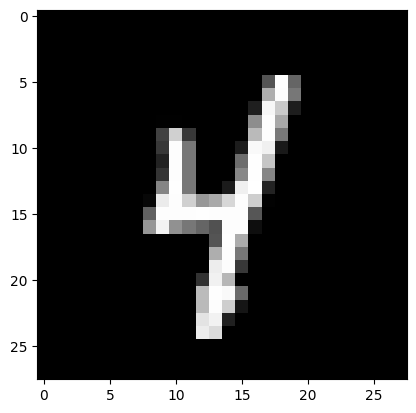

In [47]:
## Analyzing dataset to
## Important to note that the shape of the images are 28x28
for x in dataset_train:
    img, label = x
    plt.imshow(img[:,:,0], cmap='gray')

    print("Each element in our dataset is of type:", type(x))
    print("The label of this element is:", label)
    print("The shape of this image is:", img.shape)

    break

In [48]:
def nomralize_data(img, label):
    """
    Normalizes images from unsigned 8-bit to 32-bit float 
    Divides each pixel by 225 to ease computational expense 
    """
    img = tf.cast(img, tf.float32)
    img = img / 225
    return img, label

## apply normalization to every entry of train/test dataset
dataset_train = dataset_train.map(nomralize_data)

# next we shuffle up our training data again
dataset_train = dataset_train.shuffle(dataset_info.splits['train'].num_examples)

# finally we batch our data to allow us to train faster
dataset_train = dataset_train.batch(128)

## Apply same steps to testing dataset
dataset_test = dataset_test.map(nomralize_data)

dataset_test = dataset_test.batch(128)

In [49]:
## Creating Neural Network model 1 hidden layer and 1 output layer. 
## Output layer contains 10 nodes to represent the 10 possiblities the number in the image can be.
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(10)
])

/Users/youssefaliahmed/TensorFlow/.venv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
## Configuring ML model in preperation of training
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]

)

In [51]:
results = model.evaluate(dataset_train)
print("Our training loss and accuracy", results)

results = model.evaluate(dataset_test)
print("Our training loss and accuracy", results)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 802us/step - accuracy: 0.1265 - loss: 2.3457
Our training loss and accuracy [2.346639394760132, 0.12798333168029785]
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1260 - loss: 2.3506
Our training loss and accuracy [2.3476462364196777, 0.12790000438690186]


In [52]:
## Training our model and viewing it's improvments in 8 epochs
history = model.fit(
    dataset_train,
    epochs=8,
    validation_data=dataset_test
)

Epoch 1/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8366 - loss: 0.5945 - val_accuracy: 0.9452 - val_loss: 0.1865
Epoch 2/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9530 - loss: 0.1689 - val_accuracy: 0.9613 - val_loss: 0.1352
Epoch 3/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9680 - loss: 0.1141 - val_accuracy: 0.9680 - val_loss: 0.1069
Epoch 4/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9744 - loss: 0.0863 - val_accuracy: 0.9737 - val_loss: 0.0905
Epoch 5/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9815 - loss: 0.0668 - val_accuracy: 0.9753 - val_loss: 0.0825
Epoch 6/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9847 - loss: 0.0551 - val_accuracy: 0.9758 - val_loss: 0.0810
Epoch 7/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9860 - loss: 0.0467 - val_accuracy: 0.9738 - val_loss: 0.0820
Epoch 8/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9891 - loss: 0.0392 - val_accuracy: 0.9773 - v

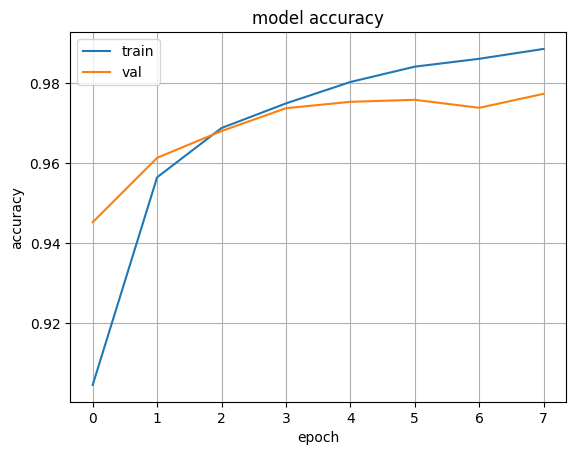

In [53]:
## Modeling the ML's learning curve against both training and validation dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.grid()
plt.show()

In [55]:
## Reseting dataset for predicting on our current trained model
dataset_test = dataset_test.unbatch()
dataset_test = dataset_test.shuffle(buffer_size=dataset_info.splits['test'].num_examples)

(1, 28, 28, 1) ()
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
This is the prediction without it being processed first:
 [[ -4.837213    -7.1123085   -3.8559732   11.200913   -15.31387
   -0.07127836 -24.390856    -1.640294    -4.7356086    5.0581374 ]]

The model's prediction for the image: 3
The actual label: 3


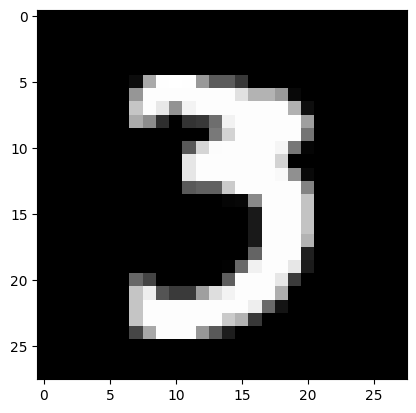

In [59]:
## Making a random prediction off the randomized dataset
def random_prediction():
    img, label = list(dataset_test.take(1))[0]
    img = tf.reshape(img, (-1, 28, 28, 1))
    print(img.shape, label.shape)

    prediction = model.predict(img)
    print("This is the prediction without it being processed first:\n", prediction)

    processed_prediction = tf.math.argmax(prediction[0])

    print("\nThe model's prediction for the image:", int(processed_prediction))
    print("The actual label:", int(label))
    plt.imshow(img[0,:,:,0], cmap="gray")


random_prediction()